# Zomato Restaurant Ratings

# **ABSTRACT**

Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is. 

We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.

Content
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.

With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as

    • Location of the restaurant
    • Approx Price of food
    • Theme based restaurant or not
    • Which locality of that city serves that cuisines with maximum number of restaurants
    • The needs of people who are striving to get the best cuisine of the neighborhood
    • Is a particular neighborhood famous for its own kind of food.

“Just so that you have a good meal the next time you step out”

The data is accurate to that available on the zomato website until 15 March 2019.
The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables.

Acknowledgements
The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..

         Source: Kaggle

**Main Objective:**

The main agenda of this project is:

>> Perform extensive **Exploratory Data Analysis(EDA)** on the Zomato Dataset.

>>Build an appropriate **Machine Learning Model** that will help various Zomato Restaurants to predict their respective Ratings based on certain features



## Feature description

1. <b>url </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost**(for two people) contains the approximate cost of meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(**city**) contains the neighborhood in which the restaurant is listed

##  1. Importing the libraires

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 1.1 Loading the dataset

In [5]:
data = pd.read_csv('zomato.csv')

In [6]:
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


#### 1.2 checking the shape of dataset

In [7]:
data.shape

(51717, 17)

- there are total 51717 samples with 17 features.

In [8]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#### 1.3  checking the datatypes

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

- there are so many object type columns, we have to convert them into numeric type. letter we will convert oject dtype to numeric type

## 2. Data Cleaning

#### 2.1 checking the missing values

In [10]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

- there are so many null values.we can clearly see that in the  '__rate__', '__phone__', '__location__', '__rest_type__', '__dish_liked__', '__cuisines__' and '__approx_cost(for two people)__' these columns have missing values.So  firstly we have to handle the missing values.

#### 2.2  Removing the unnecessary columns form data

In [11]:
df = data.drop(['url', 'phone'], axis = 1) # dropped 'url' and 'phone' columns

In [12]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### 2.3 handling the null or missing values

In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

- Now there is no null values

#### 2.4 checking the duplicates & handling the duplicates values

In [15]:
df.duplicated().sum()

11

In [16]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

- Now there are no duplicate values.

#### 2.5 Renaming the columns appropriately

In [17]:
df = df.rename(columns = {'approx_cost(for two people)':'cost',
                         'listed_in(type)':'type', 'listed_in(city)': 'city'})

In [18]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


- Sucessfully rename the columns

##### 2.6 cleaning the "cost" column

In [19]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

- here we can see that data point is string type and some values like 5,000 6,000   have comma(,). we have  to remove that ',' from the values and we have convert them into numeric type.


In [20]:
df['cost'] = df['cost'].apply(lambda x:x.replace(',', '')) # lo
df['cost'] = df['cost'].astype(float)

df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

- Now sucessfully we converted the values into numeric type

#### 2.7 handling the rate columns

In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

- here rating column also string type. we have to convert them into numeric type. we have to remove the '/5' form given values.
there is 'NEW' value which make no sense. SO we have to remove that values.

In [22]:
df = df.loc[df.rate != 'NEW'] # geting rid of 'NEW'

In [23]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
df['rate'] = df['rate'].apply(lambda x:x.replace('/5', ''))

df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [25]:
df['rate'] = df['rate'].apply(lambda x: float(x))
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23248, dtype: float64

- Now our data is cleaned and we can perform visulization

## 3. Data  Visulaization

#### 3.1 Most famous restaurant chains in banaglore

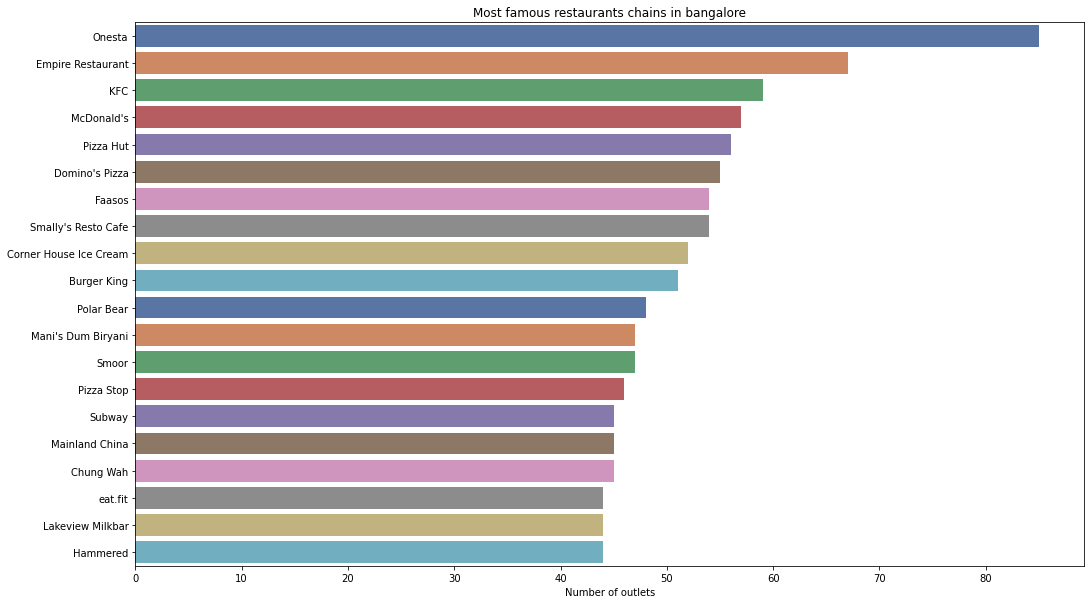

In [26]:
plt.figure(figsize = (17,10))
chains = df['name'].value_counts()[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Most famous restaurants chains in bangalore')
plt.xlabel('Number of outlets')
plt.show()

__Insights:__
- __'Onesta'__, __'Empire Restaurant'__  & __'KFC'__ are the most famous restaurant in bangalore.

#### 3.2 checking  online order or not

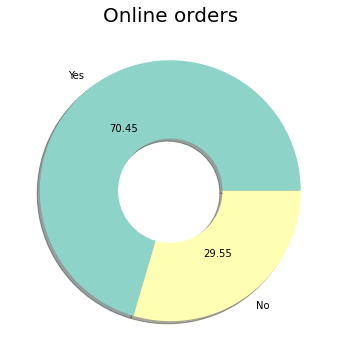

In [27]:
v = df['online_order'].value_counts()
fig = plt.gcf()
fig.set_size_inches((10,6))
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Online orders', fontsize = 20)
plt.show()


__Insight:__
- Most Restaurants offer option for online order and delivery.

#### 3.3 Book table or not

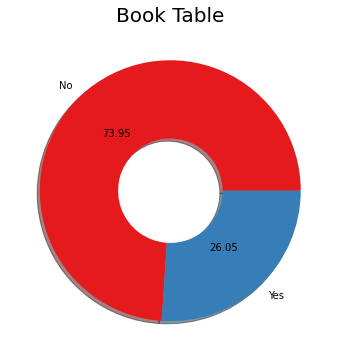

In [28]:
v = df['book_table'].value_counts()

fig = plt.gcf()
fig.set_size_inches((8,6))
cmap = plt.get_cmap('Set1')
color = cmap(np.arange(len(v)))

plt.pie(v, labels = v.index, wedgeprops= dict(width = 0.6),autopct = '%0.02f', shadow = True, colors=  color)
plt.title('Book Table', fontsize = 20)
plt.show()


__Insight:__
- Most of restaurants doesn't offer table booking.

#### 3.4 Rating Distribution

Text(0.5, 1.0, 'Rating Distribution')

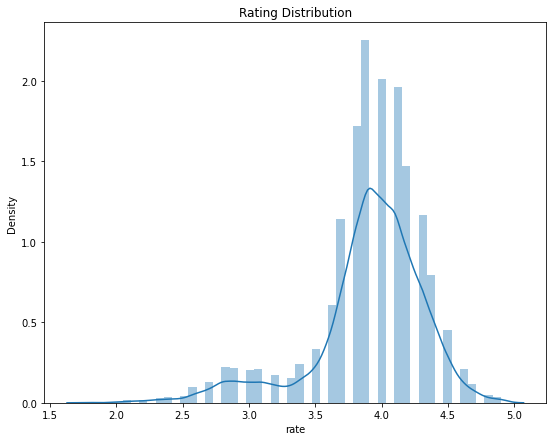

In [29]:
plt.figure(figsize = (9,7))
sns.distplot(df['rate'])
plt.title('Rating Distribution')

__Insight:__

- We can infer from above that most of the ratings are within 3.5 and 4.5

#### 3.5 Location

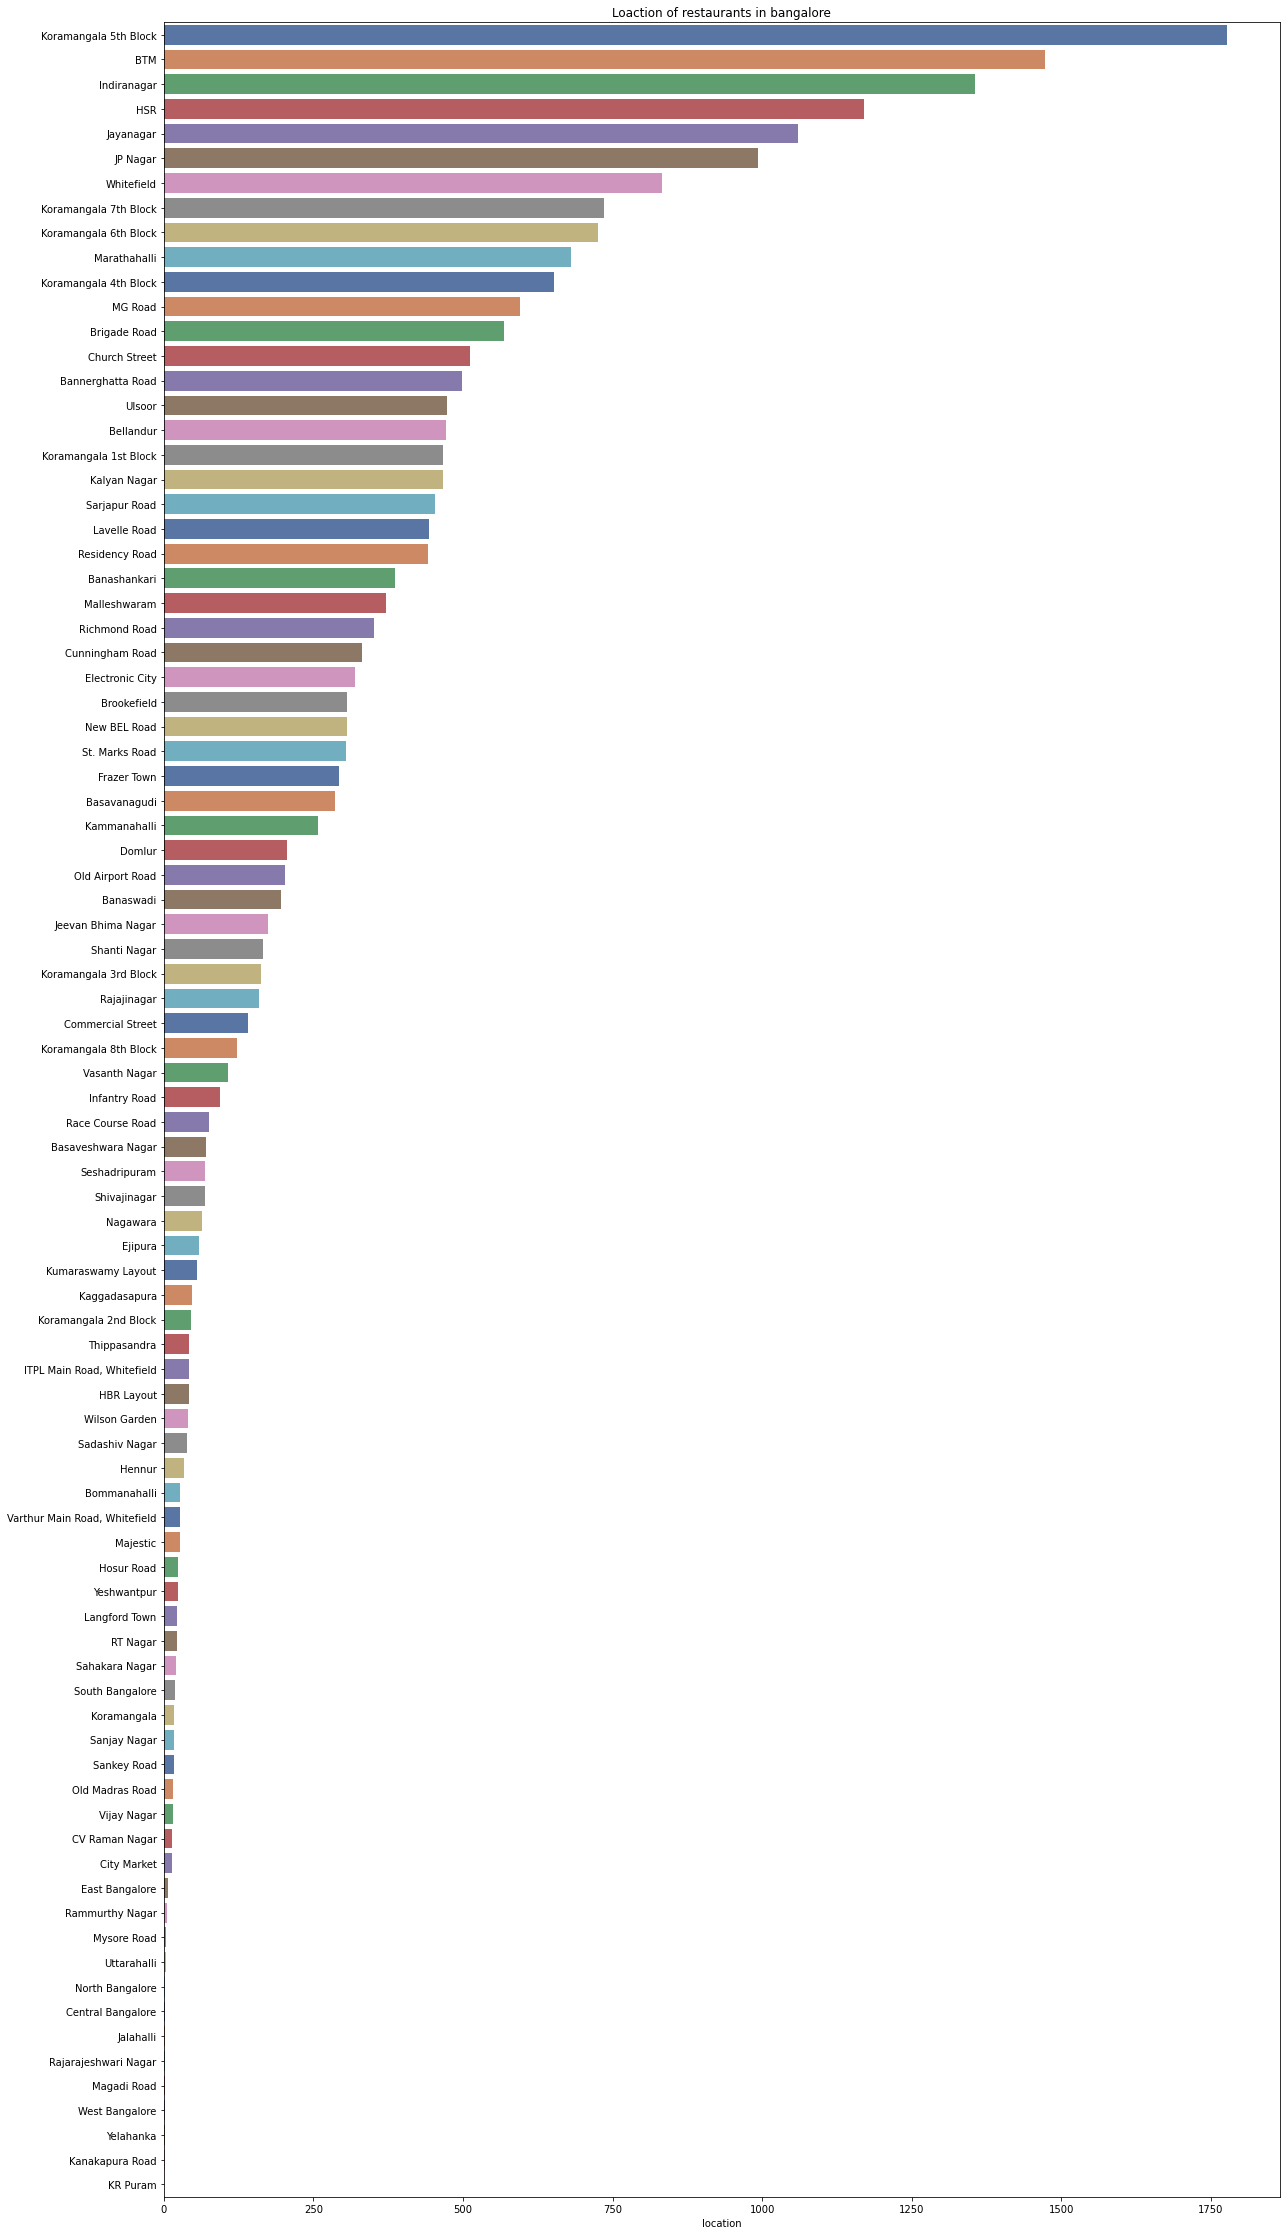

In [30]:
plt.figure(figsize=  (20,40))
chains = df['location'].value_counts()#[:20]
sns.barplot(x = chains, y=  chains.index,  palette= 'deep')
plt.title('Loaction of restaurants in bangalore')
plt.show()

__Insight:__
- Here above we can see that most of the restaurants located in '__Koramangala 5th Block__', '__BTM__' & '__Indiranagar__'.
- Then least restaurants are located  '__KR Puram__', '__Kanakapura__', '__Magadi Road__'.

#### 3.6 Restaurant Type

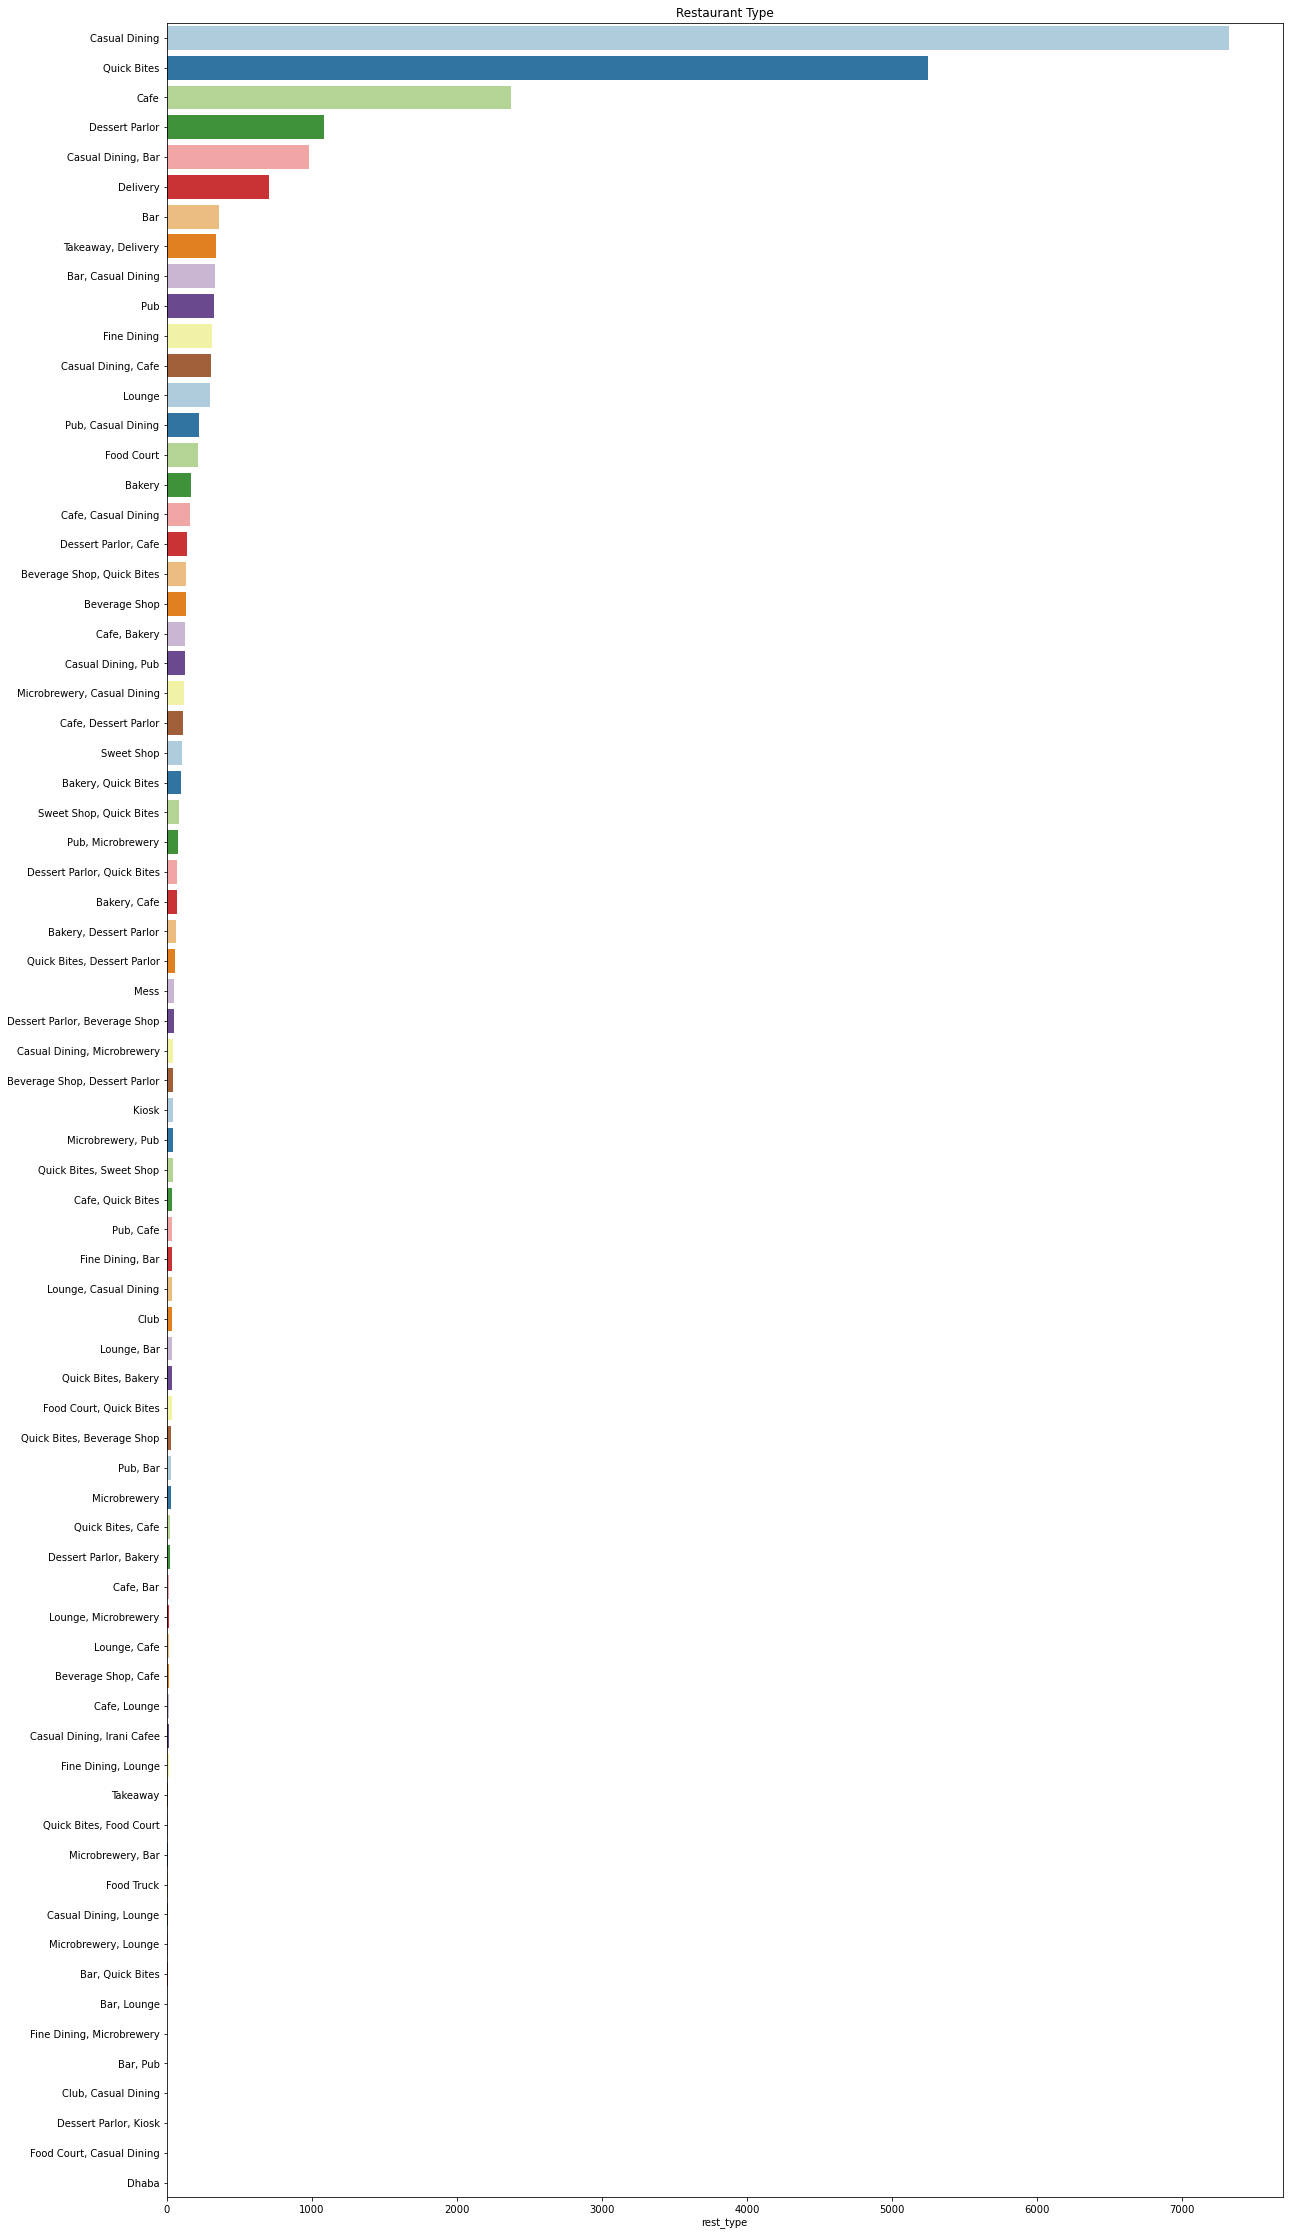

In [31]:
plt.figure(figsize = (20,40))
t = df['rest_type'].value_counts()
sns.barplot(y = t.index ,x = t, palette = 'Paired')
plt.title('Restaurant Type')
plt.show()
plt.show()

__Insight:__

- 'Casual Dining', 'Quick Bites', 'Cafe', 'Dessert Parlor' are the most common types of  restaurant.
- 'Food Court, Casual Dining', 'Dhaba' are the least common. 

#### 3.7 Most Liked Dishes

In [32]:
import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [33]:
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

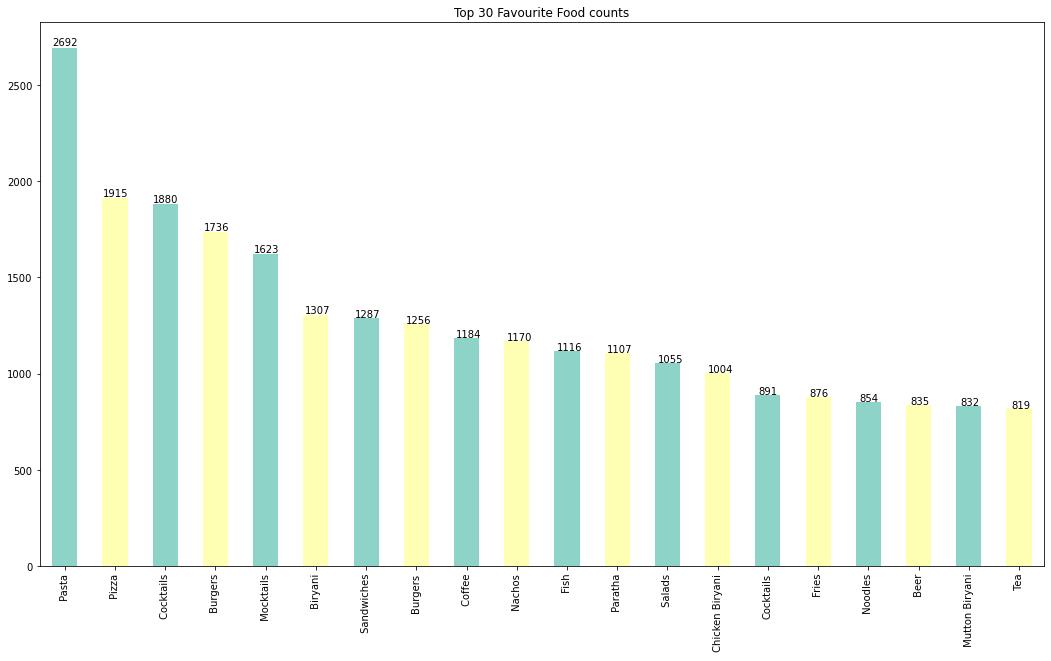

In [34]:
cmap = plt.get_cmap('Set3')
color = cmap(np.arange(len(v)))

ax = favourite_food.nlargest(n = 20, keep = 'first').plot(kind = 'bar', figsize = (18,10), title=  'Top 30 Favourite Food counts', color =  color)

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))
    

__Insights:__
-  here form above we can see that __pasta__ & __Pizza__ most famous food in bangalore restaurants. 

#### 3.8 Most popular cuisines of Bangalore

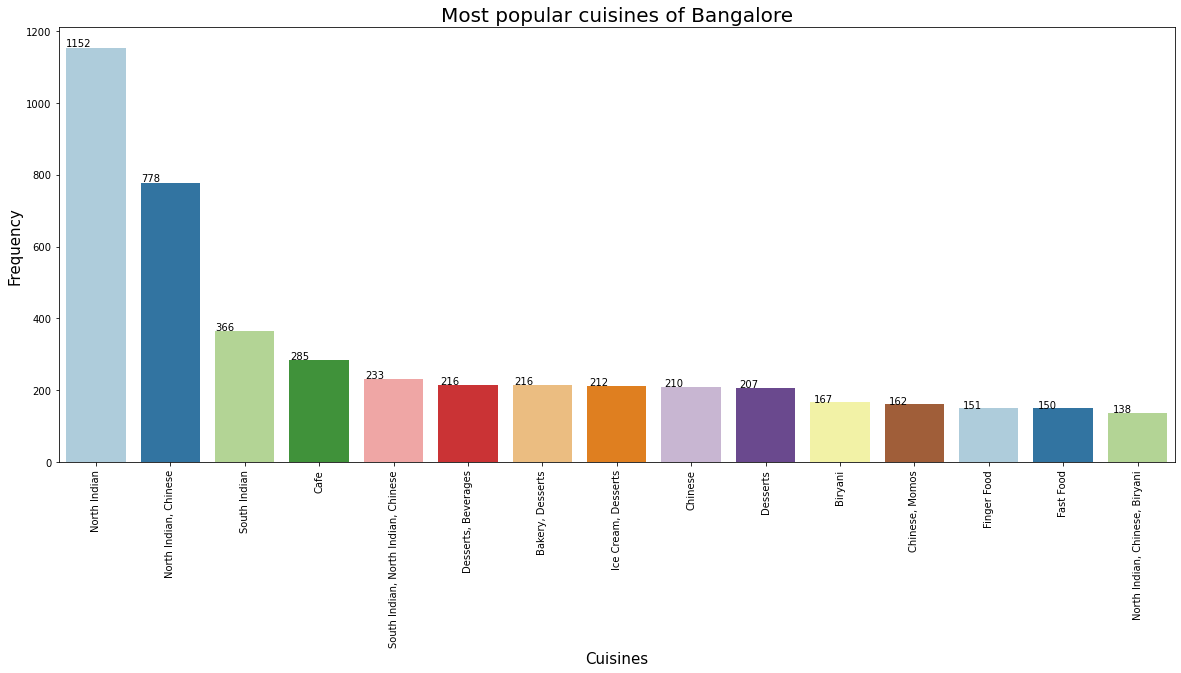

In [35]:
v = df['cuisines'].value_counts()[:15]
plt.figure(figsize = (20,8))

ax  = sns.barplot(x = v.index, y = v, palette = 'Paired')

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()*1.005, i.get_height()*1.005))


plt.title('Most popular cuisines of Bangalore', fontsize = 20)
plt.xlabel('Cuisines', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(rotation =90)
plt.show()


__Insights:__
-  Here form above we can see that North Indian  Cuisines are most famous in bangalore restaurants. 

#### 3.9 Distribution of Cost of Food for two People

- contains the approximate cost of meal for two people

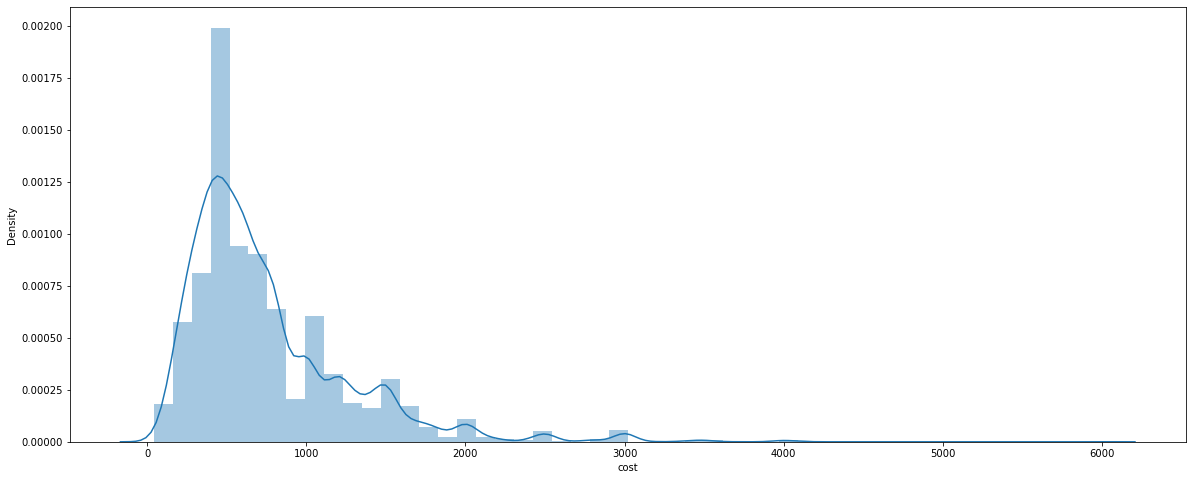

In [36]:
plt.figure(figsize=(20,8))
sns.distplot(df['cost'])
plt.show()

In [37]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

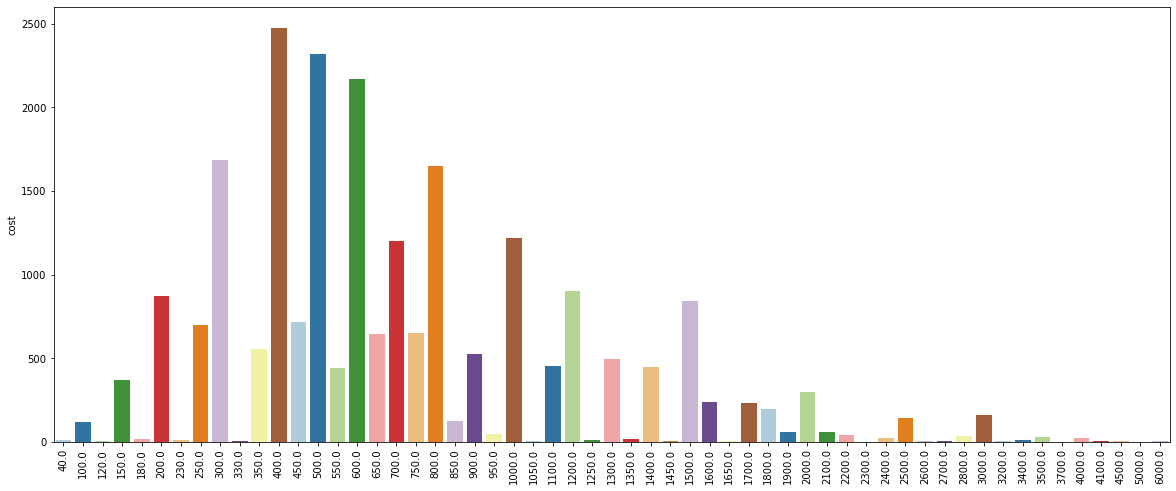

In [38]:
v = df['cost'].value_counts()
plt.figure(figsize = (20,8))

sns.barplot(x = v.index, y = v, palette = 'Paired')
plt.xticks(rotation  =90)
plt.show()

__Insights:__
-  Here form above we can that most common price for two person is __400__ in bangalore restaurants. 

#### 3.10 Services Types

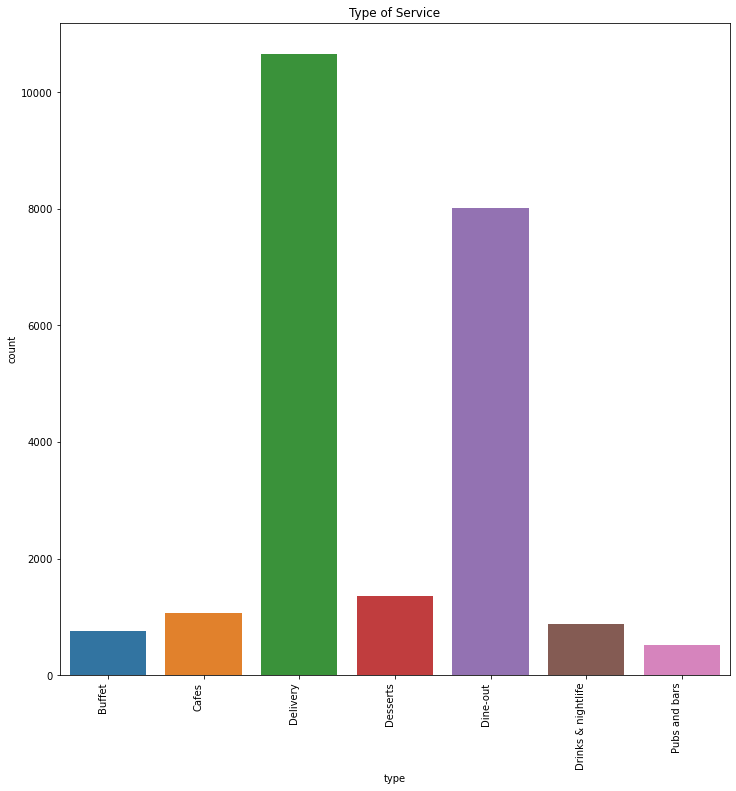

In [39]:
#Types of Services

ax  = sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.title('Type of Service')
plt.show()

__Insights:__
-  Here the two main service types are __Delivery__ and __Dine-out__. 

#### 3.11 Highest vote of restaurant

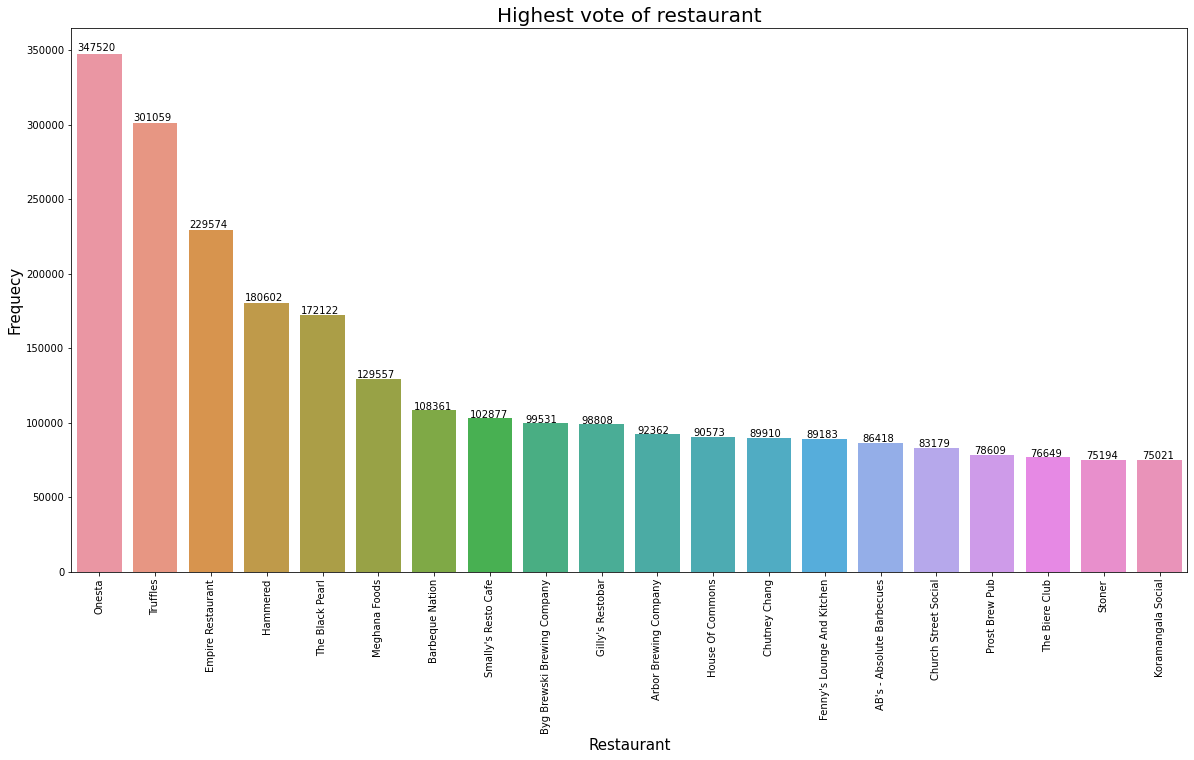

In [40]:
name_grp = df.groupby('name')
v = name_grp['votes'].agg(np.sum).sort_values(ascending = False)[:20]  ## Here i selected 20 restaurant based on high votes

plt.figure(figsize = (20,10))
ax = sns.barplot(y = v, x = v.index)

for i in ax.patches:
    ax.annotate(i.get_height().astype(int), (i.get_x()* 1.005, i.get_height()*1.005))


plt.title('Highest vote of restaurant', fontsize = 20)
plt.xlabel('Restaurant', fontsize = 15)
plt.ylabel('Frequecy', fontsize = 15)
plt.xticks(rotation =90)
plt.show()

__Insights:__
- Here from the analysis, we can see that   __'Onesta'__, __'Truffles'__ & __'Empire Restaurant'__ are  highly voted restaurants. 

## 4. Data preparing

In [41]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#### 4.1 Convert the online categorical variables into a numeric format

In [42]:
df.online_order[df.online_order == 'Yes'] = 1
df.online_order[df.online_order == 'No'] =  0

In [43]:
df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

#### 4.2 Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

df.book_table = le.fit_transform(df.book_table)

In [45]:
df.head(n=2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari


In [46]:
my_data = df.iloc[:,[2,3,4,5,6,7,9,10,12]]

my_data.to_csv('Zomato_df.csv')

In [47]:
my_data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,20,1386,800.0,5047
1,1,0,4.1,787,1,20,594,800.0,5047
2,1,0,3.8,918,1,16,484,800.0,5047
3,0,0,3.7,88,1,62,1587,300.0,5047
4,0,0,3.8,166,4,20,1406,600.0,5047


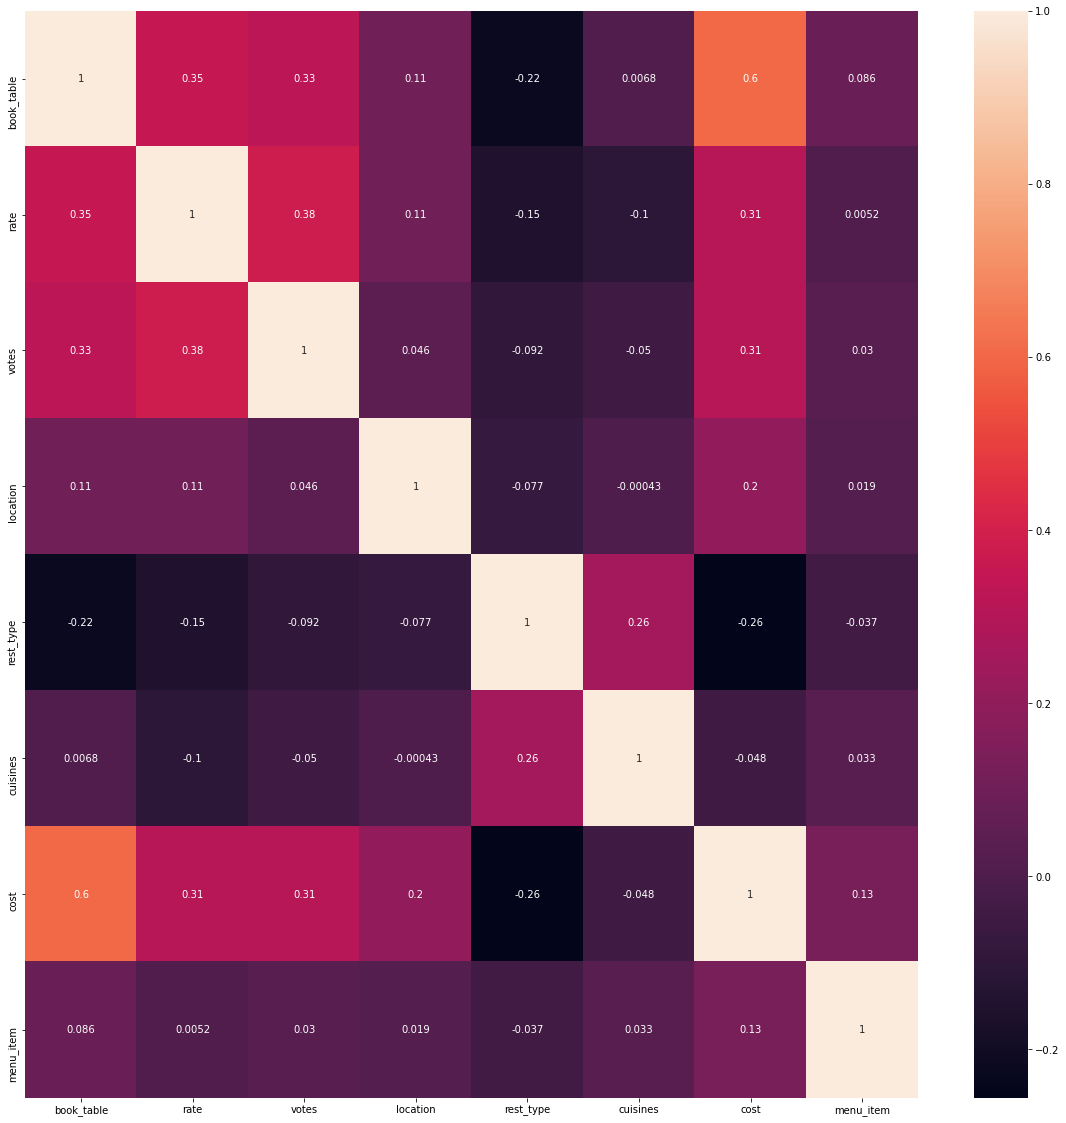

In [48]:
plt.figure(figsize = (20,20))
sns.heatmap(my_data.corr(), annot = True)
plt.show()

__Insights:__
- Here from the above we can see that rate is higly correlated with votes. 

#### 4.3 Depedent and independent variable

In [49]:
X = df.iloc[:,[2,3,5,6,7,9,10,12]]
y = df['rate']

In [50]:
X

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047
...,...,...,...,...,...,...,...,...
23243,1,1,128,84,5,1318,1200.0,5047
23244,0,0,77,84,38,878,2000.0,5047
23245,0,0,161,84,21,539,1200.0,5047
23246,0,0,81,84,21,80,800.0,5047


In [51]:
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23243    3.8
23244    3.9
23245    2.8
23246    2.5
23247    4.3
Name: rate, Length: 23248, dtype: float64

#### 4.4 Splitting data into train and test set

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=10)


In [53]:
X_train

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
17097,1,1,232,49,5,122,2000.0,5047
5558,1,1,3485,48,61,646,1700.0,5047
22590,1,1,977,71,57,669,1500.0,1171
4803,0,0,118,30,20,1185,800.0,5047
21701,0,1,497,65,54,1124,2000.0,5047
...,...,...,...,...,...,...,...,...
9372,1,1,871,30,20,1296,900.0,5047
7291,1,0,450,22,20,1209,550.0,5047
17728,0,1,592,67,20,1156,1200.0,5047
7293,0,0,196,38,29,838,500.0,5047


In [54]:
y_train

17097    4.4
5558     4.3
22590    4.0
4803     3.9
21701    4.3
        ... 
9372     4.0
7291     3.9
17728    4.3
7293     3.8
17673    3.1
Name: rate, Length: 16273, dtype: float64

## 5 Modeling

#### 5.1 Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

#predict the test set
y_pred = lr.predict(X_test)

## Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.22818828522967127


#### 5.2 Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(min_samples_leaf=0.01)

dtr.fit(X_train,y_train)

# Predict the test ser
y_pred  = dtr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))


0.374189838942661


#### 5.3 Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rfr.fit(X_train,y_train)

# Predict the test ser
y_pred  = rfr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.8809706960047533


#### 5.4 Support vector Regressor

In [58]:
from sklearn.svm import SVR
svr = SVR(kernel ='rbf')

svr.fit(X_train, y_train)

# predict the test set
y_pred = svr.predict(X_test)

# Evaluate the performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.2432761072274794


#### 5.5 Extra tree Regressor

Extra Trees is like a Random Forest, in that it builds multiple trees and splits nodes using random subsets of features, but with two key differences: it does not bootstrap observations (meaning it samples without replacement), and nodes are split on random splits, not best splits. So in summary, ExtraTrees:

 - builds multiple trees with bootstrap = False by default, which means it samples without replacement.
 - nodes are split based on random splits among a random subset of the features selected at every node

In Extra Trees, randomness doesn’t come from bootstrapping the data, but rather comes from the random splits of all observations. ExtraTrees is named for (Extremely Randomized Trees).

In [59]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators = 120)

etr.fit(X_train, y_train)

# predict the test set
y_pred = etr.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9335816483612538


## 6. Conclusion :

- From the analysis, __'Onesta'__, __'Empire Restaurant'__  & __'KFC'__ are the most famous restaurants in bangalore.
- Most Restaurants offer options for online order and delivery.
- Most restaurants don't offer table booking.
- From the analysis, most of the ratings are within 3.5 and 4.5.
- From the analysis. we can see that most of the restaurants located in '__Koramangala 5th Block__', '__BTM__' & '__Indiranagar__'.Then least restaurants are located  '__KR Puram__', '__Kanakapura__', '__Magadi Road__'.

- __'Casual Dining'__, __'Quick Bites'__, __'Cafe'__, __'Dessert Parlor'__ are the most common types of  restaurant.And __'Food Court'__, __'Casual Dining'__, __'Dhaba'__ are the least common. 
-  From the analysis, __pasta__ & __Pizza__ most famous food in bangalore restaurants. 
- From the analysis, we can see that __North Indian__  Cuisines are most famous in bangalore restaurants. 
-  Two main service types are __Delivery__ and __Dine-out__. 
- From the analysis, we can see that   __'Onesta'__, __'Truffles'__ & __'Empire Restaurant'__ are  highly voted restaurants.

- For the modeling part, i used __LinearRegression__, __DecisionTree Regressor__, __RandomForest Regressor__ , __Supprotvector Regressor__ & __ExtraTree Regressor__. From all these models __ExtraTree Regressor__ perform well compared to the other models.So i selected __ExtraTree Regressor__ for model creation.

